In [1]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.preprocessing import normalize
from scipy.spatial import distance
from scipy import linalg
import matplotlib.pyplot as plt
import pandas as pd

Test avec des données générées aléatoirement

In [2]:
x = np.random.rand(1000, 10)
x

array([[0.88475734, 0.63314154, 0.09387862, ..., 0.16464602, 0.93352656,
        0.23073243],
       [0.17204895, 0.84204956, 0.29633266, ..., 0.95291826, 0.49119126,
        0.18003323],
       [0.31682926, 0.65122905, 0.66377215, ..., 0.69800744, 0.27156495,
        0.42264126],
       ...,
       [0.37070625, 0.55741615, 0.37050306, ..., 0.62771335, 0.02049692,
        0.84728764],
       [0.02760734, 0.65800611, 0.03369431, ..., 0.72348109, 0.5201188 ,
        0.87704137],
       [0.20596871, 0.76270855, 0.04647908, ..., 0.4271226 , 0.65039261,
        0.79656366]])

In [3]:
tsne = TSNE(n_components=2, perplexity=30)

In [4]:
x_tsne = tsne.fit_transform(x)

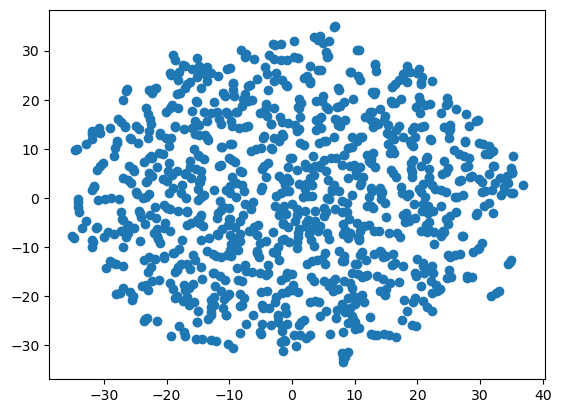

In [6]:
plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(x_tsne[:, 0], x_tsne[:, 1])
plt.show()

Test avec les données publiques de Google Merch Store

In [2]:
df = pd.read_csv('test.csv')
df.head()

,user_id,recency_days,monetary,session_frequency
0,1.008608e+06,72,0.0,14.4
1,1.092570e+06,44,0.0,22.0
2,1.108537e+06,43,0.0,43.0
3,1.127241e+06,43,0.0,43.0
4,1.129216e+06,43,0.0,43.0


In [3]:
df = df.drop(columns=['user_id'])
df

,recency_days,monetary,session_frequency
0,72,0.0,14.4
1,44,0.0,22.0
2,43,0.0,43.0
3,43,0.0,43.0
4,43,0.0,43.0
...,...,...,...
111936,90,0.0,45.0
111937,90,0.0,90.0
111938,90,0.0,90.0
111939,90,0.0,90.0


In [8]:
corr_matrix = df.corr()
corr_matrix

,recency_days,monetary,session_frequency
recency_days,1.000000,0.056274,0.739131
monetary,0.056274,1.000000,-0.081133
session_frequency,0.739131,-0.081133,1.000000


In [5]:
tsne = TSNE(n_components=2, perplexity=30, metric='correlation')

In [5]:
df_tsne = tsne.fit_transform(df)

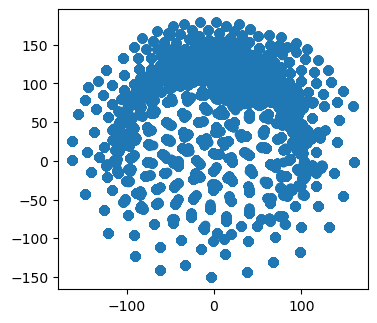

In [13]:
plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(df_tsne[:, 0], df_tsne[:, 1])
plt.show()

Spectral clustering

In [14]:
sc = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', assign_labels='kmeans')

In [17]:
sc_df = sc.fit(df)

/Users/loicvandenbroeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [19]:
sc_df

SpectralClustering(affinity='nearest_neighbors', n_clusters=4)

In [18]:
plt.scatter(sc_df[:, 0], sc_df[:, 1], c=sc.labels_, cmap='viridis')
plt.show()

TypeError: 'SpectralClustering' object is not subscriptable

K-Means clustering

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans_df = kmeans.fit(df)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
kmeans_df['cluster'] = cluster_labels
kmeans_df['centroids'] = centroids

In [ ]:
plt.scatter(df['recency_days'], df['monetary'], c=cluster_labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.xlabel('recency_days')
plt.ylabel('monetary')
plt.show()

select subset from dataframe

In [4]:
subset_df = df.sample(5000)
subset_df

,recency_days,monetary,session_frequency
64425,43,0.0,43.000000
24701,73,0.0,24.333333
34078,48,0.0,48.000000
85869,11,0.0,11.000000
87185,14,0.0,14.000000
...,...,...,...
60842,67,0.0,67.000000
68807,74,0.0,74.000000
66003,37,0.0,18.500000
61278,62,0.0,62.000000


In [6]:
subset_df_tsne = tsne.fit_transform(subset_df)

In [9]:
y_pred = KMeans(n_clusters=7).fit_predict(subset_df)

/Users/loicvandenbroeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Labeled data with Kmeans clustering')

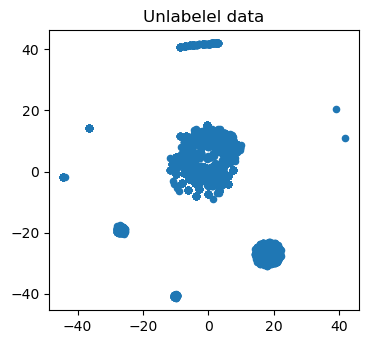

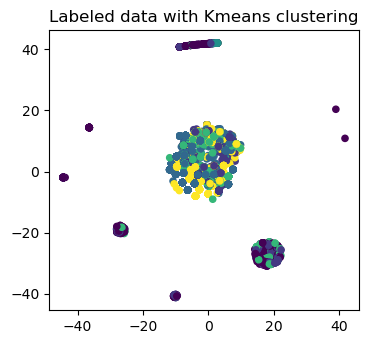

In [10]:
plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(subset_df_tsne[:, 0], subset_df_tsne[:, 1], s=20)
plt.title("Unlabelel data")

plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(subset_df_tsne[:, 0], subset_df_tsne[:, 1], c=y_pred, s=20)
plt.title("Labeled data with Kmeans clustering")

Similarity graph

In [23]:
rbf_param = 10

K = np.exp(-rbf_param * distance.cdist(subset_df, subset_df, metric='sqeuclidean'))
D = K.sum(axis=1)
D = np.sqrt(1/D)
M = np.multiply(D[np.newaxis, :], np.multiply(K, D[:, np.newaxis]))

Eigenvalues decomposition

In [24]:
U, Sigma, _ = linalg.svd(M, full_matrices=False, lapack_driver='gesvd')
Usubset = U[:,0:3]

In [25]:
y_pred_sc = KMeans(n_clusters=7).fit_predict(normalize(Usubset))

/Users/loicvandenbroeck/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Labeled data with Kmeans clustering')

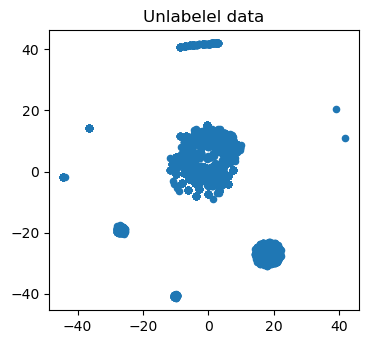

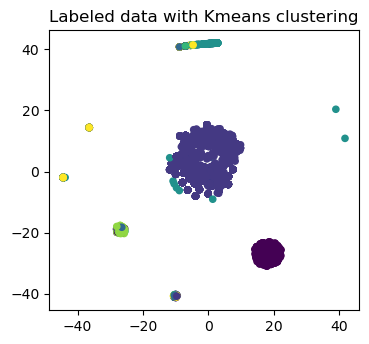

In [26]:
plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(subset_df_tsne[:, 0], subset_df_tsne[:, 1], s=20)
plt.title("Unlabelel data")

plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(subset_df_tsne[:, 0], subset_df_tsne[:, 1], c=y_pred_sc, s=20)
plt.title("Labeled data with Kmeans clustering")